In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('dataset.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 14 columns):
age         1119 non-null int64
sex         1119 non-null int64
cp          1119 non-null int64
trestbps    1119 non-null int64
chol        1119 non-null int64
fbs         1119 non-null int64
restecg     1119 non-null int64
thalach     1119 non-null int64
exang       1119 non-null int64
oldpeak     1119 non-null float64
slope       1119 non-null int64
ca          1119 non-null int64
thal        1119 non-null int64
target      1119 non-null int64
dtypes: float64(1), int64(13)
memory usage: 122.5 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000
mean,54.267203,0.689008,0.984808,131.382484,246.102770,0.151028,0.529937,150.084004,0.321716,1.038785,1.403038,0.713137,2.305630,0.537087
std,9.057119,0.463106,1.032019,17.355751,52.068683,0.358236,0.525509,22.818921,0.467343,1.151765,0.619618,1.014615,0.613995,0.498846
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.shape

(1119, 14)

## Feature Selection

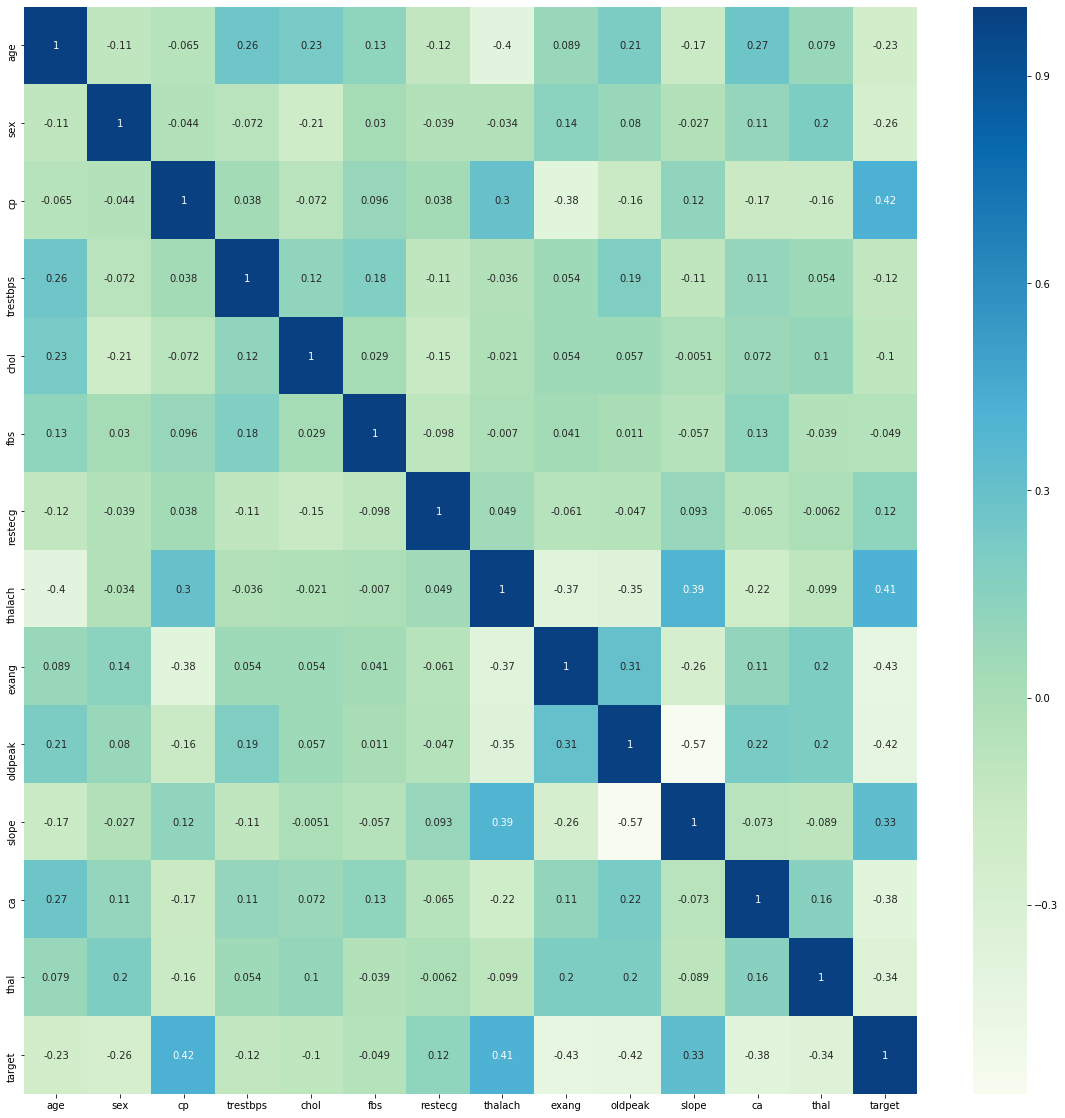

In [8]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="GnBu")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BA76FD9B48>,
      dtype=object)

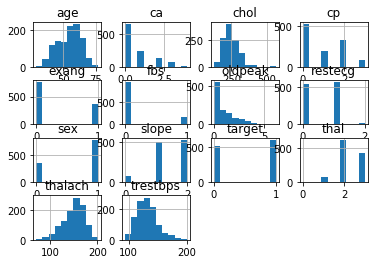

In [8]:
df.hist()

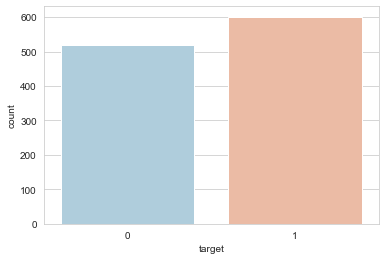

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')

In [10]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [11]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [14]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.250435,-0.367909,-0.655250,0.785489,-0.033689,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,-0.139975,0.496744,-0.828176,0.215531,1.790415,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,1.737841,0.784962,-1.385382,-1.099755,1.356104,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0.743703,0.957893,-0.828176,0.478589,-0.902310,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,0.854163,0.381457,0.920297,-1.932770,0.748070,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [15]:
dataset.to_csv("dataset_new.csv")

In [17]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

In [18]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

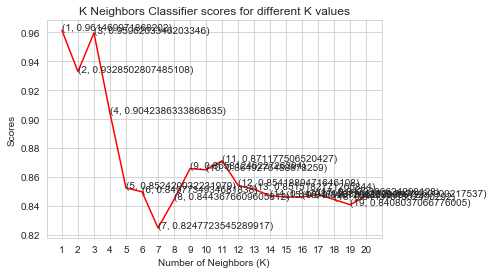

In [19]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1],(i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [20]:
knn_classifier = KNeighborsClassifier(n_neighbors = 1)
score=cross_val_score(knn_classifier,X,y,cv=10)


In [21]:
knn = score.mean()*100

In [22]:
knn

96.1469971868202

# decion tree

In [23]:
from sklearn.model_selection import train_test_split

#test_size=0.25 means that make train set as 75% and test set as 25%

stratify=y makes the distribution simalar 

In [24]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 101, stratify=y, test_size=0.25)

In [25]:
y_train.value_counts(normalize=True)

1    0.537545
0    0.462455
Name: target, dtype: float64

In [26]:
y_valid.value_counts(normalize=True)

1    0.535714
0    0.464286
Name: target, dtype: float64

In [27]:
X_train.shape, y_train.shape

((839, 30), (839,))

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

In [30]:
max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,y_train)
    Y_pred_dt = dt.predict(X_valid)
    current_accuracy = round(accuracy_score(Y_pred_dt,y_valid)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_valid)

In [31]:
dt = round(accuracy_score(y_pred_dt,y_valid)*100,2)

# Random forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(200):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_valid,y_valid)
    Y_pred_rf = rf.predict(X_valid)
    current_accuracy = round(accuracy_score(Y_pred_rf,y_valid)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_valid,y_valid)
y_pred_rf = rf.predict(X_valid)

In [33]:
round(accuracy_score(y_pred_rf,y_valid)*100,2)

99.29

In [36]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

random_classifier = RandomForestClassifier()

parameters = { 'max_features':np.arange(5,10),'n_estimators':[500],'min_samples_leaf': [10,50,100,200,300]}

random_grid = GridSearchCV(random_classifier, parameters, cv = 5)

In [37]:
random_grid.fit(X_valid,y_valid)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [38]:
random_grid_pred = random_grid.predict(X_valid) 
random_grid_pred

array([0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [39]:
random_grid.score(X_train,y_train)

0.8438617401668653

In [40]:
random_grid.score(X_valid,y_valid)

0.8821428571428571

In [42]:
rf = round(accuracy_score(random_grid_pred ,y_valid)*100,2)
rf

88.21

# kmeans algorithm

In [43]:
from sklearn.cluster import KMeans

In [44]:
SSE_scaled = []

In [45]:
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster)
    kmeans.fit(dataset)
    SSE_scaled.append(kmeans.inertia_)

In [ ]:
plt.figure(figsize=(12,6))
frame_scaled = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE_scaled})
plt.plot(frame_scaled['Cluster'], frame_scaled['SSE'], marker='o')
plt.xlabel("Clusters")
plt.ylabel("SSE")

In [ ]:
kmeans = KMeans(n_jobs = -1, n_clusters = 2)
kmeans.fit(dataset)
pred = kmeans.predict(dataset)

In [ ]:
pred

In [ ]:
frame1 = pd.DataFrame(dataset)

In [ ]:
frame1['cluster'] = pred

In [ ]:
frame1['cluster'].value_counts()

In [ ]:
frame1.head(20)

In [ ]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [ ]:
result = confusion_matrix(frame1['target'],frame1['cluster'])

In [ ]:
result

In [ ]:
accuracy_score(frame1['target'],frame1['cluster'])

In [ ]:
classification_report(frame1['target'],frame1['cluster'])

# logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
y_pred_lr = lr.predict(X_valid)

In [ ]:
logreg = round(accuracy_score(y_pred_lr,y_valid)*100,2)

# navie bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb=GaussianNB()

In [ ]:
nb.fit(X_train,y_train)

In [ ]:
y_pred_nb=nb.predict(X_valid)

In [ ]:
nbay = round(accuracy_score(y_pred_nb,y_valid)*100,2)

# support vector (svm)

In [ ]:
from sklearn import svm

In [ ]:
sv = svm.SVC(kernel='linear')

In [ ]:
sv.fit(X_train,y_train)

In [ ]:
y_pred_sv = sv.predict(X_valid)

In [ ]:
svm = round(accuracy_score(y_pred_sv,y_valid)*100,2)

## output

In [ ]:
scores = [logreg,nbay,svm,knn,dt,rf]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest"]    


In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)